<a href="https://colab.research.google.com/github/swaroop-raj/machine-learning/blob/main/Term_Deposit_Subscription.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem statement (Term Deposit Sale)


---


We have data from a Portuguese bank on details of customers related to selling a term deposit. The objective of the project is to help the marketing team identify potential customers who are relatively more likely to subscribe to the term deposit and this increase the hit ratio.


### What is a Term Deposit?
A Term deposit is a deposit that a bank or a financial institution offers with a fixed rate (often better than just opening deposit account) in which your money will be returned back at a specific maturity time.

 

### Resources Available

The historical data for this project is available in file https://archive.ics.uci.edu/ml/datasets/Bank+Marketing

 

### Deliverable –1 (Exploratory data analysis)–(15)

**Univariate analysis (9marks)**
* Data types and description of the independent attributes which should include (name,  range of values observed, central values (mean and median), standard deviation and quartiles, skewness). - 3 Marks
* Make a function to plot ‘countplot’ if the variable is categorical and ‘distplot’ if the variable is numeric. - 3 Marks
* Identify outliers using IQR and verify the same using plots. Also mention the percentage of data points which are considered outliers. Should we treat them, why or why not? - 3 Marks

**Multivariate analysis (6marks)**
* Make a function to plot boxplots for all continuous variables VS ‘Target’ variable and countplots for all categorical variables VS ‘Target’ variable? - 3 Marks
* Bi-variate analysis between predictor variables and target column. Comment on your findings in terms of their relationship and degree of relation if any. Visualize the analysis using pair plots, heatmaps, histograms or density curves. - 3 Marks
 

### Deliverable –2 (Prepare the data for analytics)–(5)

* Label encode or create dummy variables for categorical variables. Give reason for selecting either of them. - 2 Marks
* Create the training set and test set in a ratio of 70:30. Make sure and verify distribution of classes is the same in the full dataset and train test split data. - 3 Marks
 

### Deliverable –3 (Create the ensemble model)–(30)

* Build the ensemble models (Bagging and Boosting) and Decision Tree model (at least 4 models in total). Note the model performance by using different metrics. Use confusion matrix to evaluate class level metrics i.e. Precision/Recall. - 10 Marks
* Also reflect the training and testing score of all the models. Build a dataframe with model names as row index and all the metrics calculated as columns - 5 Marks
* Explain the confusion matrix related terms like recall, precision etc. Also, select the best metric to choose one of the models from above. Give your reason for the same. - 5 Marks
* Answer the following questions : - 10 Marks
What do you mean by recall and what information does it provide here?
* Suggest some changes for the organization so that they can increase the number of customers who take term deposit.
* How much influence does the previous campaign and mode of interaction have on financial performance.
* Which features should be more/less focused by the bank to get better results and why?
* What did you learn about banking industries from this data?
 

** Note : ** Use random_state=7 (wherever the parameter can be used) so that we can compare all submissions.

## Attribute Information

1. age
2. job : type of job
3. marital : marital status
4. education
5. default: has credit in default?
6. housing: has housing loan?
7. loan: has personal loan?
8. balance in account
9. contact: contact communication type
10. month: last contact month of year
11. day: last contact day of the month
12. duration: last contact duration, in seconds
13. campaign: number of contacts performed during this campaign and for this client
14. pdays: number of days that passed by after the client was last contacted from a previous campaign
15. previous: number of contacts performed before this campaign and for this client
16. poutcome: outcome of the previous marketing campaign
17. Output variable ('Target'): has the client subscribed a term deposit?

## `Index`

----------------------
- <a href = #link1>Import the datasets and libraries, check datatype, statistical summary, shape, null values or incorrect imputation</a>


- <a href = #link2>Exploratory Data Analysis</a> 

    - <a href = #link3>Number of unique in each column?</a> 
  

## <a id = "link1"></a> Import Libraries and Load Dataset

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import pandas as pd
from sklearn.linear_model import LogisticRegression

# Importing the libraries for ploting
import matplotlib.pyplot as plt
# To enable plotting graphs in Jupyter notebook
%matplotlib inline

#importing seaborn for statistical plots
import seaborn as sns

#importing train test split from sklearn for preraing traing and test dataset for the logistic model

from sklearn.model_selection import train_test_split

import numpy as np
from scipy import stats

# calculate accuracy measures and confusion matrix
from sklearn import metrics

**Reading the dataset:**

In [ ]:
data = pd.read_csv('/content/bank-full.csv');

## <a id = "link2"></a> Deliverable –1 (Exploratory data analysis)

In [ ]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [ ]:
data.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no


In [ ]:
data.shape

(45211, 17)

In [ ]:
data.nunique()

age            77
job            12
marital         3
education       4
default         2
balance      7168
housing         2
loan            2
contact         3
day            31
month          12
duration     1573
campaign       48
pdays         559
previous       41
poutcome        4
Target          2
dtype: int64

**Null checks the dataset:**

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  Target     45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [ ]:
print(data['contact'].value_counts())
print()
print(data['marital'].value_counts())
print()
print(data['education'].value_counts())
print()
print(data['month'].value_counts())
print()
print(data['poutcome'].value_counts())

cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64

married     27214
single      12790
divorced     5207
Name: marital, dtype: int64

secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64

may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: month, dtype: int64

unknown    36959
failure     4901
other       1840
success     1511
Name: poutcome, dtype: int64


 **Insights:**
- `For many customers there is unknown contact communication channel. These could be door to door or mail communication. We shall re-define these to two categories "phone" and "others" .`
- `Q2 has the most amount of contacts to customers , May being the busiest month for the campaining team`
- `Previous Outcome (poutcome) has many other and unknown values.We shall investigate more on data and see if we can categorize these values to success ot failure based on data.`

**Stastical description of the dataset:**

In [ ]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0
duration,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0


### <a id = "link8"></a> Univariate Analysis

Distribution plot for the features attributes

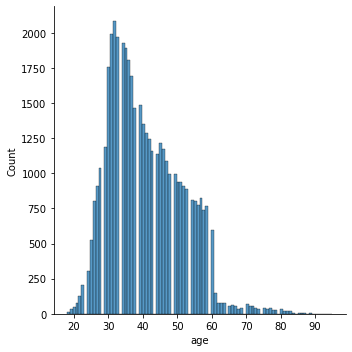

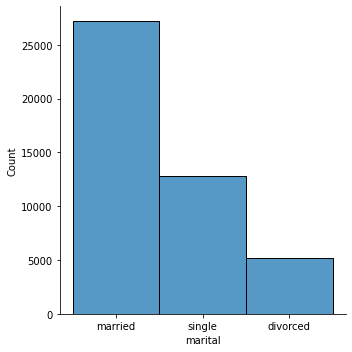

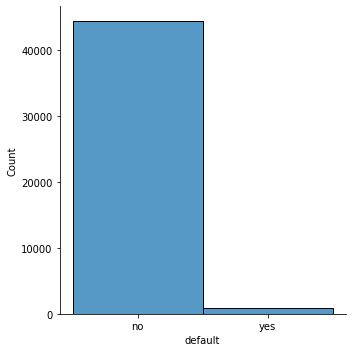

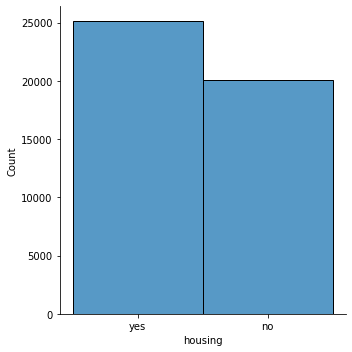

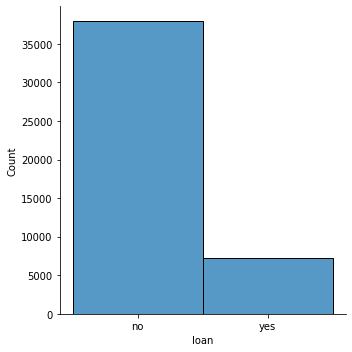

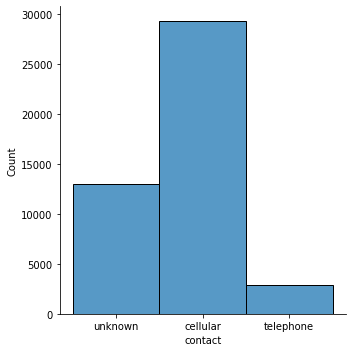

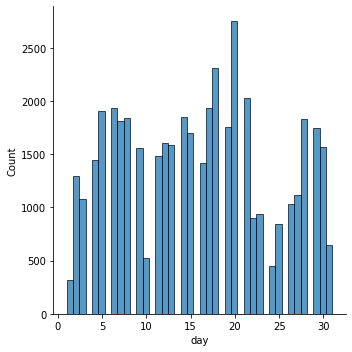

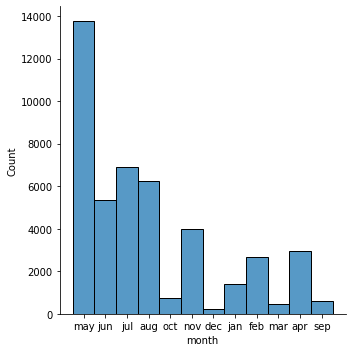

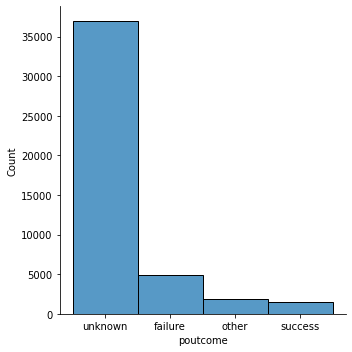

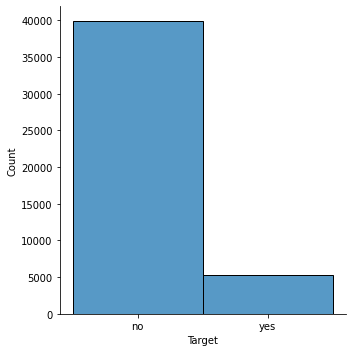

In [ ]:
for col in data.columns :
  if col not in ['job', 'balance','education','duration','campaign' , 'pdays','previous'] :
    sns.displot(data[col], kind='hist')
    plt.show()

 **Insights:**
- `The dataset has customers from various age groups. 30 - 40 years being the most common age group`
- `Majority of people are married`
- `Majority of people are non defaulters`
- `Majority of people donot have loans with the bank`
- `Majority of the people have not subscribed to Term deposit from previous campains`


In [ ]:
for col in data.columns 

### <a id = "link10"></a> Bivariate Analysis

**Insights:**
- `Income, CCAvg and Mortgage values are higher for people who have taken loan `

## <a id = "link11"></a> Model building using Logistic Regression from Sklearn 

### <a id = "link12"></a> Split the data into training and test set in the ratio of 70:30 respectively

### <a id = "link14"></a> Metrics related to evaluating the model performance (accuracy, recall, precision, f1score, and roc_auc_score)

### <a id = "link15"></a> Heatmap to display confusion matrix 

### <a id = "link16"></a> Graph to show the ROC Curve

### <a id = "link17"></a> Coefficients of the attrbutes

### <a id = "link18"></a> Rows where the predicted class is not equal to the observed class

## <a id = "link19"></a> Conclusion Buisness Insights

##### `Confusion matrix means`

*True Positive (observed=1,predicted=1):*

Predicted that customr will accept the personal loan and the customer accepted the personal loan

*False Positive (observed=0,predicted=1):*

Predicted that customr will accept the personal loan and the customer did not accepted the personal loan

*True Negative (observed=0,predicted=0):*

Predicted that customr will not accept the personal loan and the customer did not accepted the personal loan

*False Negative (observed=1,predicted=0):*

Predicted that customr will not accept the personal loan and the customer accepted the personal loan


##### `Important Features`

"Education" with value "Undergrad" , "CD Account" , "Family" , "Credit Card" 

are the top features which influence the model's output. This is based on the coefficient value.

"Mortgage" - has coefficients value as 0 so this feature doesn't help model in predicting target variable.


##### `Important Metric`

The objective here is for the bank to predict potential customers who can accept the personal loan campain. Hence the key metrric would be **less number of False Negative**, since if False Negative is high the bank might loose potential customers who are good candidates for accepting personal loan , loosing significant loan intrest renevenue stream . 

Hence **Recall is the most important metric**.

In case of False Positive the bank might might not have the customers accept the loan , but those customers are very good target audience to make some customized advertisement for personal loan. As model predicts that those customers have higher chances of accepting personal loan.

Hence **F1 Score is also an valuable metric**.

